In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('../utils'))
if module_path not in sys.path:
    sys.path.append(module_path)
from create_actionshist_keys import *
from actionshist_utils import *

In [7]:
path_tokens = '/eos/user/l/llayer/AIErrorLogAnalysis/data/word2vec/tokens_index_avg.h5'
path_actionshist = '/eos/user/l/llayer/AIErrorLogAnalysis/data/actionshist/actionshistory_300719.json'

# Load the actionshistory
print( 'Loading actionshist and generating keys' )
actionshist = load_data(path_actionshist)
set_binary_labels(actionshist)
actionshist_keys = get_keys(actionshist, ignore_neg_code = False)

# Get the error messages
print( 'Loading tokens' )
tokens = pd.read_hdf( path_tokens )
tokens.error = tokens.error.astype(str)
tokens.error = tokens.error.str.encode('utf-8')
tokens.site = tokens.site.str.encode('utf-8')

Loading actionshist and generating keys
Loading tokens


In [10]:
actionshist_keys.head()

,task_name,error,site,site_state,count,label
0,/amaltaro_Run2016D-v2-DoubleMuonLowMass-07Aug1...,-1,T1_US_FNAL_Disk,bad,1,0
1,/amaltaro_Run2016D-v2-DoubleMuonLowMass-07Aug1...,-1,T3_US_FNALLPC,bad,1,0
2,/amaltaro_Run2016D-v2-DoubleMuonLowMass-07Aug1...,-1,T3_US_FNALLPC,bad,1,0
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,-1,T1_DE_KIT_Disk,bad,1,0
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,good,2,0


## Plot the length of the error messages

In [24]:
tokens.head()

,task_name,error,site,exit_codes,error_type,steps_counter,names,error_msg_tokenized,avg_w2v
0,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,99999,ReportManipulatingError,0,stageOut1,"[228, 19, 242, 53, 2, 22, 189, 365]","[-0.6327675, 1.057197, 0.056380782, -0.3644849..."
1,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,85,CMSSWStepFailure,2,cmsRun1,"[14, 32, 67, 44, 7, 6, 80, 76, 467, 671, 76, 7...","[-0.43909624, 0.5063496, 0.60487694, -0.056146..."
2,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,8021,Fatal Exception,2,cmsRun1,"[93, 27, 7, 92, 306, 73, 69, 9, 28, 470, 6144,...","[-1.0769646, 1.2356042, 0.88608974, 0.11158812..."
3,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,99999,ErrorLoggingAddition,2,cmsRun1,"[14, 120, 5, 1, 156, 18, 153, 5, 53, 14, 32, 1...","[-0.55738294, 0.87854844, 1.2031463, -0.585931..."
4,/fabozzi_Run2016G-v1-DoubleMuonLowMass-07Aug17...,85,T2_US_Florida,99999,ReportManipulatingError,0,stageOut1,"[228, 19, 242, 53, 2, 22, 189, 365]","[-0.6327675, 1.057197, 0.056380782, -0.3644849..."


In [52]:
def length(frame, key, log=False, bins=100, set_range=None):

    # Length of the sequences
    len_lists = frame[key].str.len()
    import matplotlib.pyplot as plt
    if set_range is not None:
        ax = len_lists.hist(bins = 100, range=set_range)
    else:
        ax = len_lists.hist(bins = bins)
    if log == True:
        ax.set_yscale('log')
    plt.show

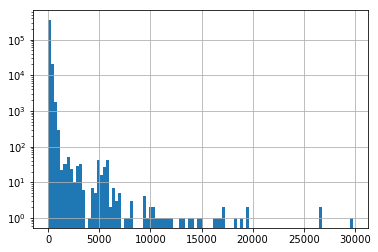

In [53]:
length(tokens, 'error_msg_tokenized', log=True)

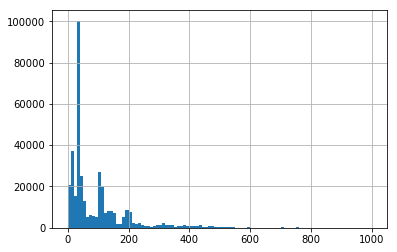

In [54]:
length(tokens, 'error_msg_tokenized', set_range=[0,1000])

## Plot the length of the number of error messages per key

In [48]:
tokens_seq =  tokens.groupby(['task_name', 'error', 'site'], as_index=False)['exit_codes'].agg(lambda x: list(x))

In [34]:
tokens_error = tokens_seq.groupby(['task_name', 'error'], as_index=False)['site'].agg(lambda x: list(x))

In [36]:
tokens_error.head(10)

,task_name,error,exit_codes,site
0,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,85,"[[85, 8021, 99999, 85]]",[T1_UK_RAL]
1,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,"[[50664, 143, 50115, 99999, 143]]",[T2_DE_RWTH]
2,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,"[[50664, 143, 50115, 99999, 143]]",[T2_DE_RWTH]
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,"[[50664, 143, 50115, 99999, 143]]",[T2_DE_RWTH]
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,99400,[[99400]],[NoReportedSite]
5,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,"[[50664, 143, 50115, 99999, 143]]",[T2_DE_RWTH]
6,/amaltaro_Run2018A-v1-EGamma-17Sep2018_1024p1_...,134,"[[134, 99999, 134], [134, 99999, 134], [134, 8...","[T2_FR_GRIF_LLR, T2_UK_London_IC, T2_US_Florid..."
7,/amaltaro_Run2018A-v1-EGamma-17Sep2018_1024p1_...,139,"[[139, 50115, 99999, 139], [139, 50115, 99999,...","[T1_UK_RAL, T1_US_FNAL_Disk, T2_US_Florida, T2..."
8,/amaltaro_Run2018A-v1-EGamma-17Sep2018_1024p1_...,50664,"[[50664, 143, 50115, 99999, 143], [50664, 143,...","[T1_RU_JINR, T1_UK_RAL, T1_US_FNAL_Disk, T2_FR..."
9,/amaltaro_Run2018A-v1-EGamma-17Sep2018_1024p1_...,8002,"[[8002, 8002, 66], [8002, 8002, 66], [8002, 80...","[T1_RU_JINR, T2_FR_GRIF_LLR, T2_UK_SGrid_RALPP..."


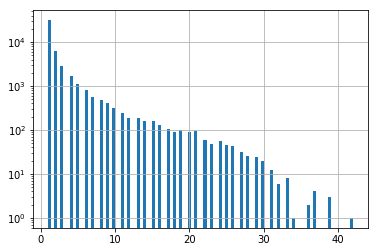

In [42]:
length(tokens_error, 'site', log=True)

## Plot the number of error messages per task

In [49]:
tokens_task = tokens_seq.groupby(['task_name'], as_index=False)['error', 'site'].agg(lambda x: list(x))

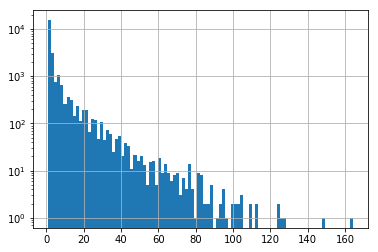

In [50]:
length(tokens_task, 'error', log=True)